# Predicting the “Fraud in auto insurance claims” 

# Problem Description

A major general insurance company has a business problem with significant number of claims being reported are fraudulent in nature and it is leading to leakages.  So, the Insurer decided to predict the fraudulent ones before even processing the claims to allocate costs appropriately, to keep the thorough investigation process in place and to design proper action plan for the claims etc.

Insurance fraud refers to any claim with the intent to obtain an improper payment from an insurer.  Motor and health insurance are the two prominent segments that have seen a spurt in fraud. Frauds can be classified from source and/or nature point of view. 

Sources can be policyholder, intermediary and/or internal with the latter two being more critical from internal control framework point of view. Frauds can be classified into nature wise, for example, application, inflation, identity, fabrication, staged/contrived/induced accidents etc. 

Fraud affects the lives of innocent people as well as the insurance industry and thus it may be of interest for the health of the Insurance Industry and Society. In fact, Insurers report certain classified cases to Regulator and Law enforcement agencies like Police, Crime Bureaus and others as mandated by the Regulators/Government and required by Law. With the advent of organised gangs and/or collusion, the problem has become more complex and sophisticated and the frauds have been difficult to detect and to prove, if detected.


#### Almost 45,000 crore insurance frauds took place in India in the year 2019. Most insurance companies lose 10-15% in all areas of business, and fraudulent health insurance claims can be as high as 35%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
demographics = pd.read_csv("Train_Demographics.csv",na_values="NA")

In [3]:
claim = pd.read_csv("Train_Claim.csv",na_values=("?","-5","MISSINGVALUE",'MISSEDDATA'))

In [4]:
policy = pd.read_csv("Train_Policy.csv",na_values=("-1","MISSINGVAL","NA"))

In [5]:
vehicle = pd.read_csv("Train_Vehicle.csv",na_values="???")

In [6]:
traindata = pd.read_csv("Traindata_with_Target.csv")

In [7]:
#shape of all data frames
print(demographics.shape)
print(claim.shape)
print(policy.shape)
print(vehicle.shape)
print(traindata.shape)

(28836, 10)
(28836, 19)
(28836, 10)
(115344, 3)
(28836, 2)


# Demographics Data

In [8]:
demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


# Claim data

In [9]:
claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481


# Vehicle Data

In [10]:
vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


#### vehicle data is inadequate so we need to arrange data properly

In [11]:
Vehicledata=vehicle['VehicleAttribute'].unique()
Vehicle=pd.concat([vehicle.set_index(['CustomerID']).groupby('VehicleAttribute')['VehicleAttributeDetails'].get_group(key) for key in Vehicledata],axis=1)
Vehicle.columns=Vehicledata
Vehicle.reset_index(inplace=True)

In [12]:
Vehicle.head()

,CustomerID,VehicleID,VehicleModel,VehicleMake,VehicleYOM
0,Cust20179,Vehicle8898,Forrestor,BMW,2011
1,Cust13038,Vehicle30212,Maxima,Toyota,2000
2,Cust1801,Vehicle24096,MDX,Accura,1999
3,Cust14947,Vehicle15216,Ultima,Nissan,1998
4,Cust19144,Vehicle29018,Fusion,Ford,2011


# Policy Data

In [13]:
policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


# Target Data

In [14]:
traindata.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


# Merging all dataframes into One dataframe

In [15]:
df = pd.merge(pd.merge(pd.merge(pd.merge(demographics,claim),Vehicle),policy),traindata)    

In [16]:
df

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,...,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,...,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,...,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India,...,119114,321,1998-04-18,State1,500/1000,655,1276.01,0,unmarried,N
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India,...,119115,237,2004-09-07,State2,100/300,1089,1273.38,0,unmarried,N
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India,...,119117,392,1998-09-10,State3,250/500,787,1380.92,3448735,own-child,N
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India,...,119118,391,1998-08-10,State3,250/500,780,1389.29,3364301,not-in-family,N


In [17]:
#df.to_csv('insurance.csv')

In [18]:
df.shape

(28836, 42)

## Imputing the Null Values

In [19]:
#checking the null values of every column in the dataframe
df.isnull().sum()

CustomerID                        0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                           2
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage       

### Impute Numeric Attributes

In [20]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64']).columns

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
cols = df[num_cols].columns
df[cols] = imputer.fit_transform(df[cols])

### Impute Categorical Attributes

In [22]:
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
cols = df[cat_cols].columns
df[cols] = imputer.fit_transform(df[cols])

In [23]:
df.isnull().sum()

CustomerID                    0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
VehicleID                     0
VehicleModel                  0
VehicleMake                   0
VehicleY

## Conversion of Data Types

In [24]:
df.dtypes

CustomerID                     object
InsuredAge                    float64
InsuredZipCode                float64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                  float64
CapitalLoss                   float64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles              float64
PropertyDamage                 object
BodilyInjuries                float64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfProp

In [25]:
df[cat_cols] = df[cat_cols].apply(lambda col: col.astype('category'))
df[num_cols] = df[num_cols].apply(lambda col: col.astype('float64'))

In [26]:
df.dtypes

CustomerID                    category
InsuredAge                     float64
InsuredZipCode                 float64
InsuredGender                 category
InsuredEducationLevel         category
InsuredOccupation             category
InsuredHobbies                category
CapitalGains                   float64
CapitalLoss                    float64
Country                       category
DateOfIncident                category
TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState                 category
IncidentCity                  category
IncidentAddress               category
IncidentTime                   float64
NumberOfVehicles               float64
PropertyDamage                category
BodilyInjuries                 float64
Witnesses                      float64
PoliceReport                  category
AmountOfTotalClaim             float64
AmountOfInjuryClaim      

In [27]:
df.to_csv('insurance1.csv')

## Visualizations

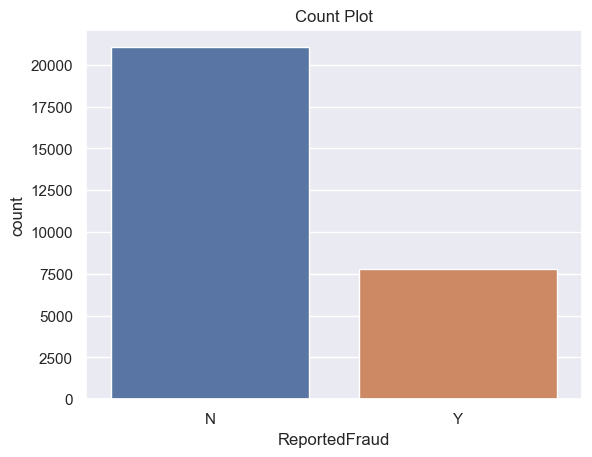

In [28]:
sns.set_theme(style="darkgrid")
sns.countplot(x= "ReportedFraud" ,data =df)
plt.title("Count Plot")
plt.show()

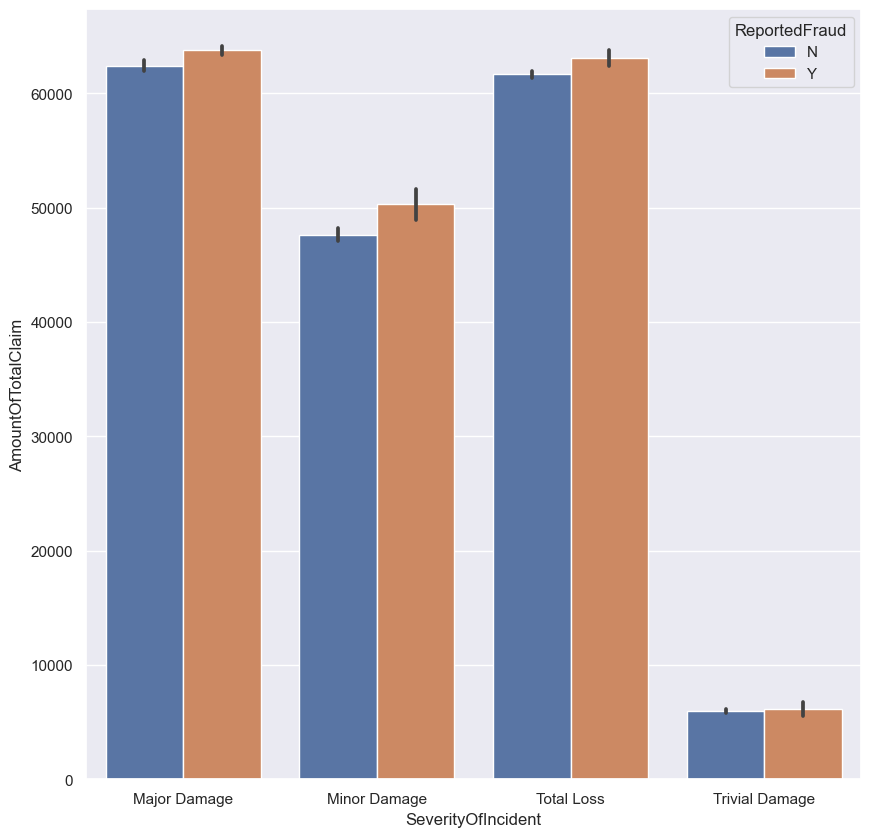

In [29]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = 'SeverityOfIncident', y = 'AmountOfTotalClaim', hue = 'ReportedFraud',
                   data = df, orient='v')
plt.show()

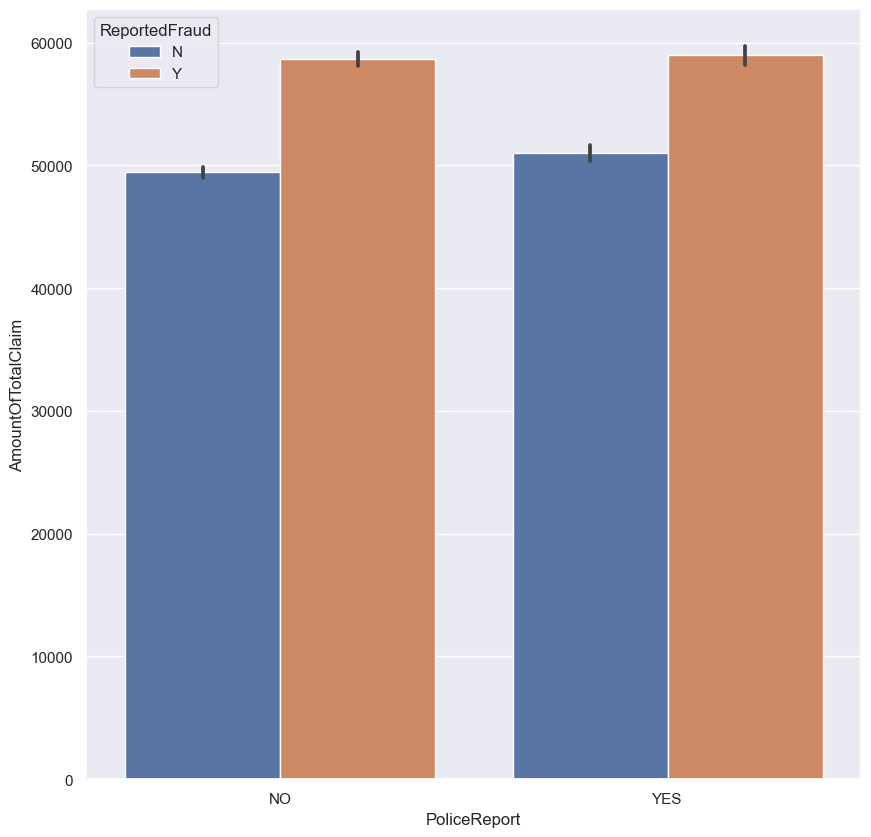

In [30]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = 'PoliceReport', y = 'AmountOfTotalClaim', hue='ReportedFraud',data = df)
plt.show()

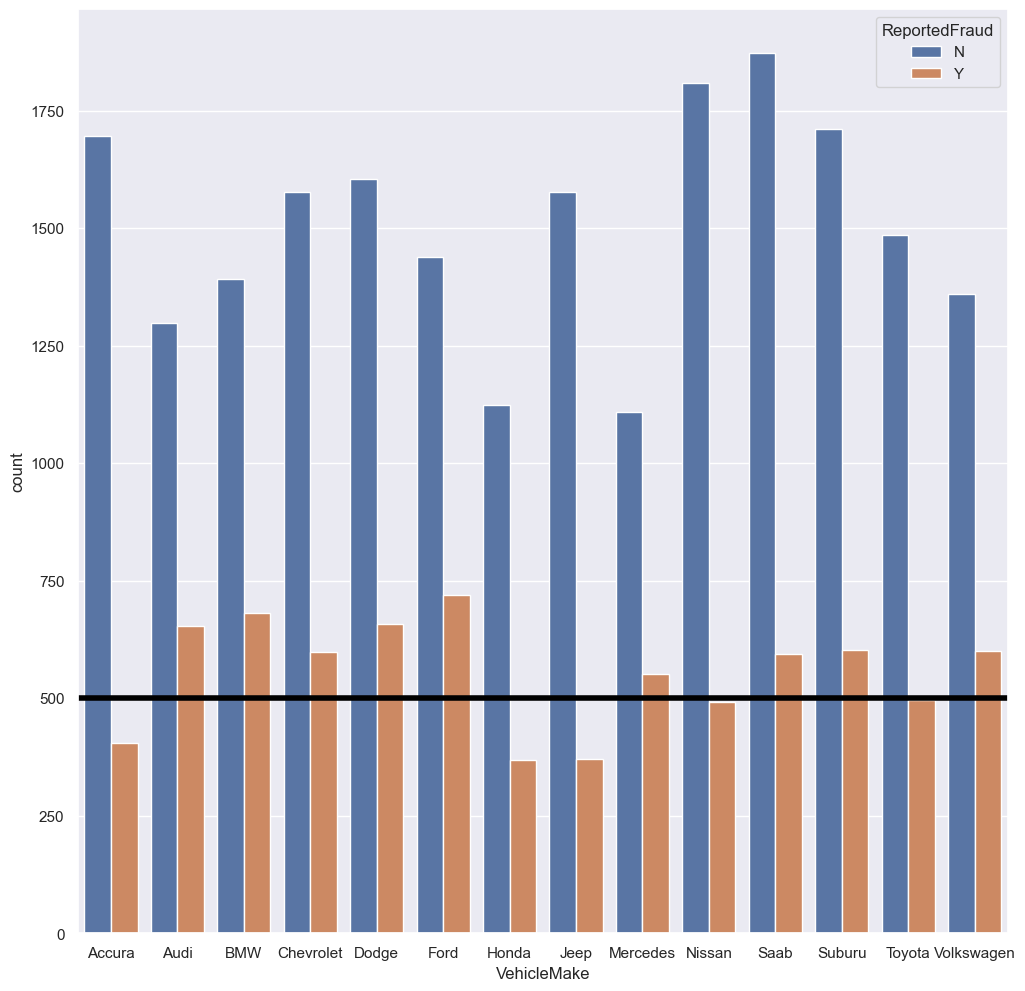

In [31]:
f, ax = plt.subplots(figsize=(12, 12))
threshold=500
sns.countplot(x = "VehicleMake" ,hue="ReportedFraud",data=df)
plt.axhline(threshold, color='black', ls='-',linewidth=4)
plt.show()

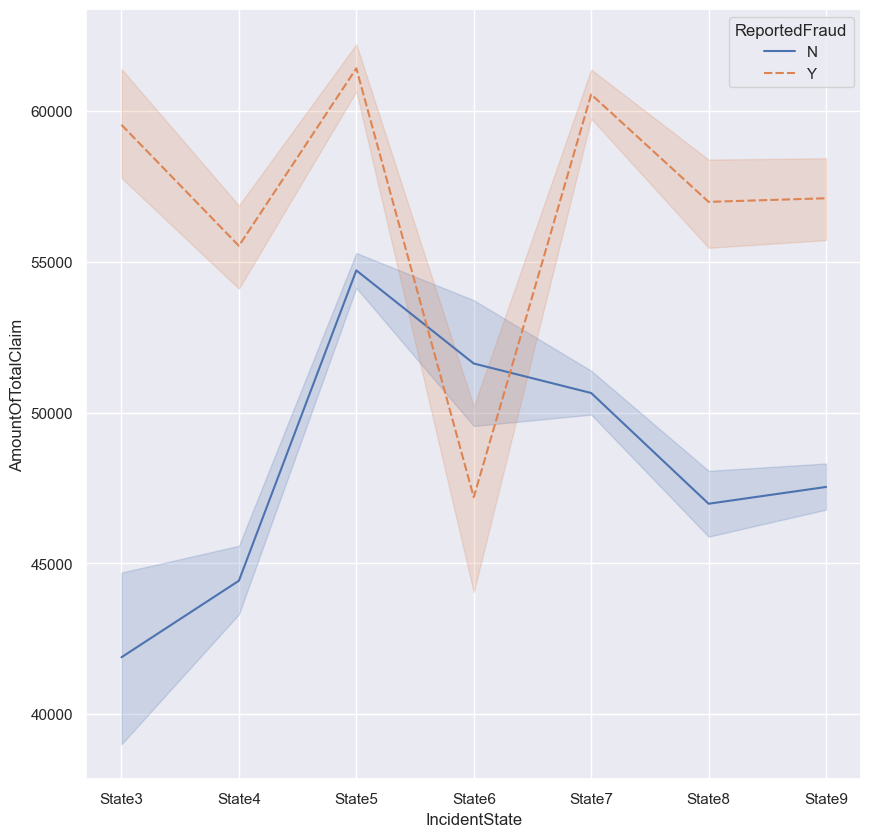

In [32]:
f, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x = "IncidentState", y = "AmountOfTotalClaim", data = df, hue = "ReportedFraud",style="ReportedFraud")
plt.show()

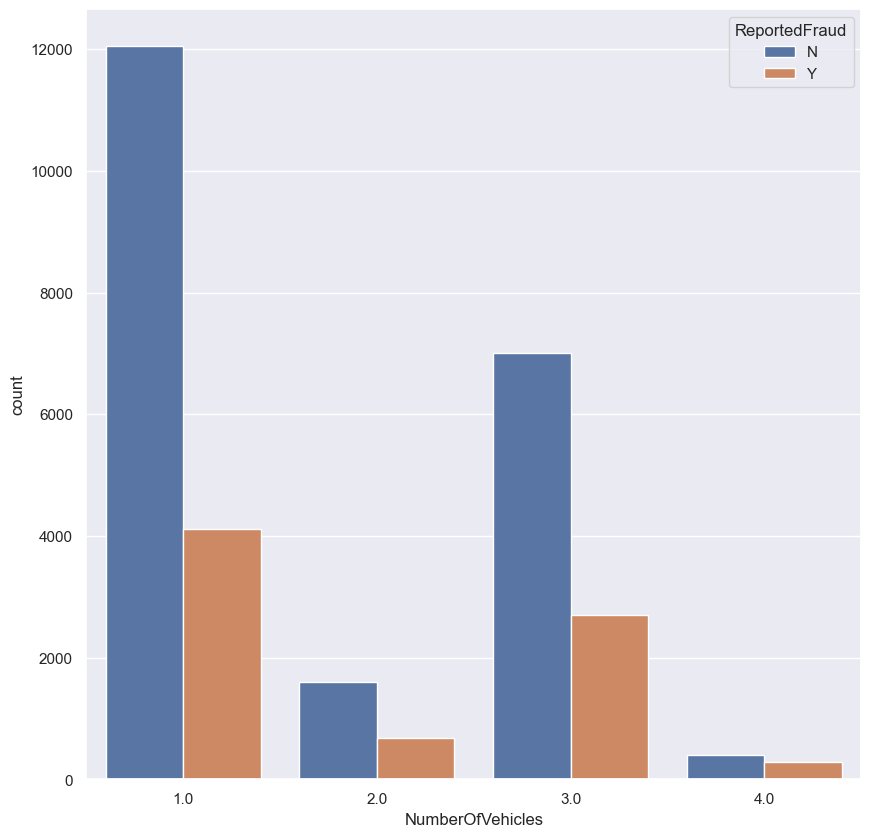

In [33]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='NumberOfVehicles',hue='ReportedFraud',data=df)
plt.show()

In [34]:
#Finding the outliers for numerical columns in the data

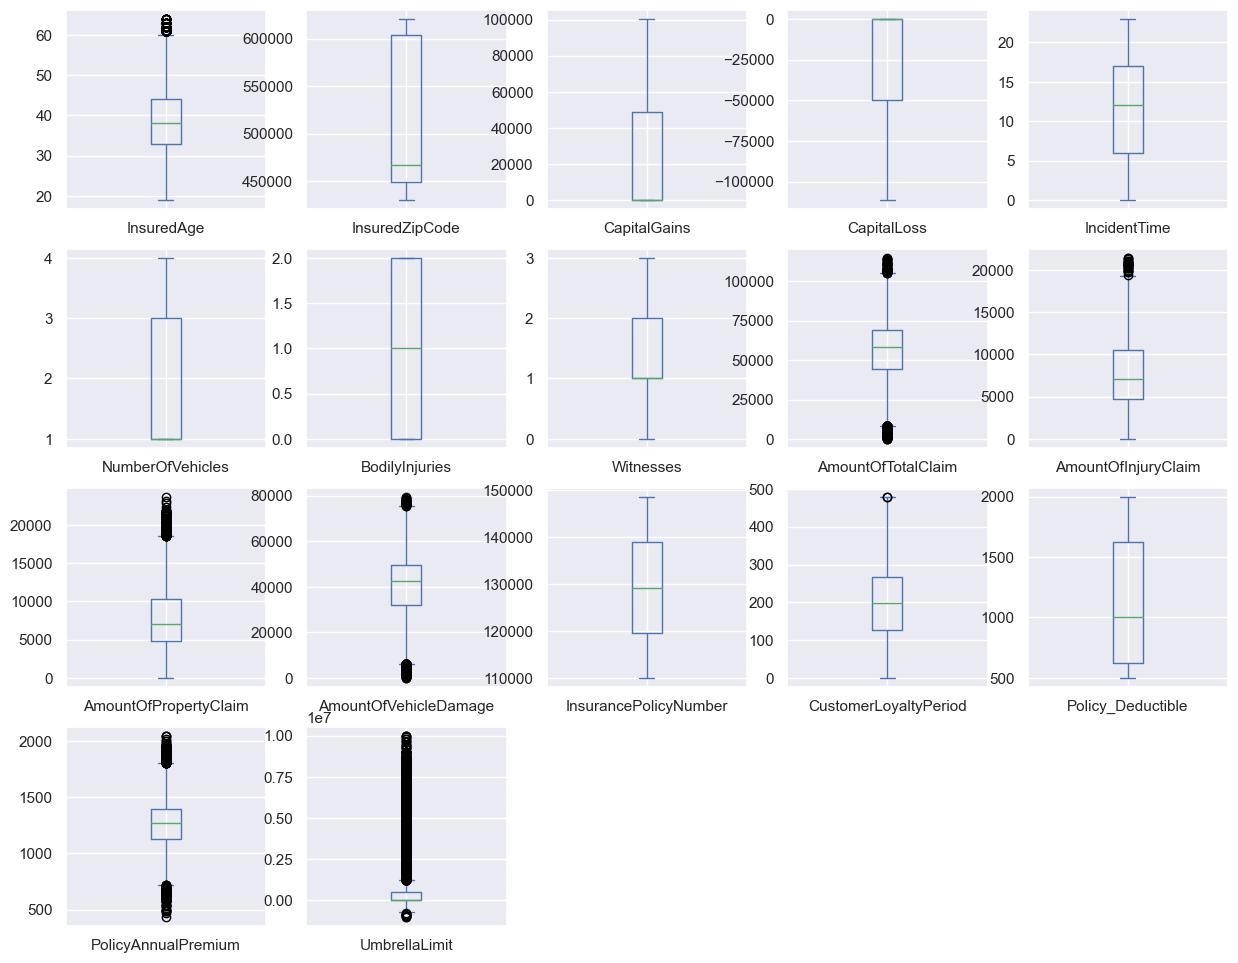

In [35]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(15,15))
plt.show()

In [38]:
df.shape

(28836, 42)

# standardize numeric attributes

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

In [40]:
X = df.drop("ReportedFraud",axis =1)
y = df['ReportedFraud']

In [41]:
category = X.select_dtypes(include=['category']).columns
numerical = X.select_dtypes(include=['float64']).columns

In [42]:
category

Index(['CustomerID', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'Country', 'DateOfIncident',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'VehicleID',
       'VehicleModel', 'VehicleMake', 'VehicleYOM', 'DateOfPolicyCoverage',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship'],
      dtype='object')

## Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = category

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

In [44]:
le = LabelEncoder()

y = le.fit_transform(y)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=13456,stratify=y)

In [47]:
print("shape of X_train:",X_train.shape)
print("shape of X_validation:",X_validation.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_validation:",y_validation.shape)

shape of X_train: (23068, 41)
shape of X_validation: (5768, 41)
shape of y_train: (23068,)
shape of y_validation: (5768,)


## Model Building

### Defining Error Metrics

We choose F1_Score as an Error Metric

The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean.

In [243]:
scores = pd.DataFrame(columns=['Model','Train_F1_Score','validation_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    validation_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description,train_f1score,validation_f1score],
                                            index=scores.columns ), ignore_index=True)
    return(dataframe)

## Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
l_model = LogisticRegression()

In [245]:
l_model.fit(X_train, y_train)

LogisticRegression()

In [246]:
y_train_Pred = l_model.predict(X_train)
y_validation_Pred = l_model.predict(X_validation)

In [247]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"Logistic_Regression",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565


In [248]:
from mlxtend.plotting import plot_learning_curves

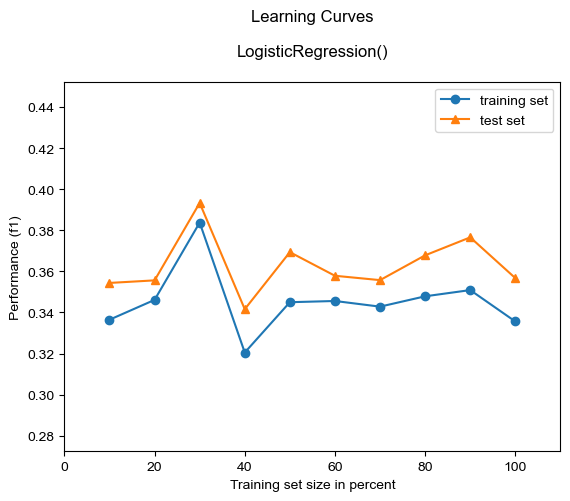

In [249]:
plot_learning_curves(X_train,y_train,X_validation,y_validation,l_model,scoring='f1')
plt.show()

## Naive bayes 

In [250]:
from sklearn.naive_bayes import GaussianNB

In [251]:
naive_classfier = GaussianNB()
naive_classfier.fit(X_train,y_train)

GaussianNB()

In [252]:
y_train_Pred = naive_classfier.predict(X_train)
y_validation_Pred = naive_classfier.predict(X_validation)

In [253]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"Naive_Bayes",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565
1,Naive_Bayes,0.820552,0.829704


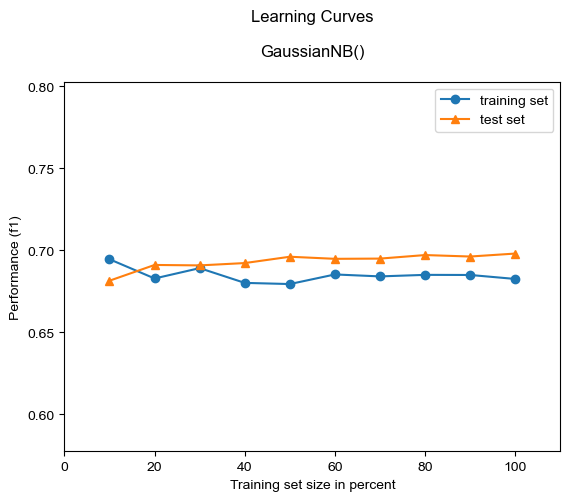

In [254]:
plot_learning_curves(X_train,y_train,X_validation,y_validation,naive_classfier,scoring='f1')
plt.show()

### Logistic model 2 - Using Penalty as 'L1'

In [255]:
#lasso
l1_model = LogisticRegression(penalty='l1', solver='liblinear')
l1_model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [256]:
y_train_Pred = l1_model.predict(X_train)
y_validation_Pred = l1_model.predict(X_validation)

In [257]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"L1_model",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565
1,Naive_Bayes,0.820552,0.829704
2,L1_model,0.823122,0.829774


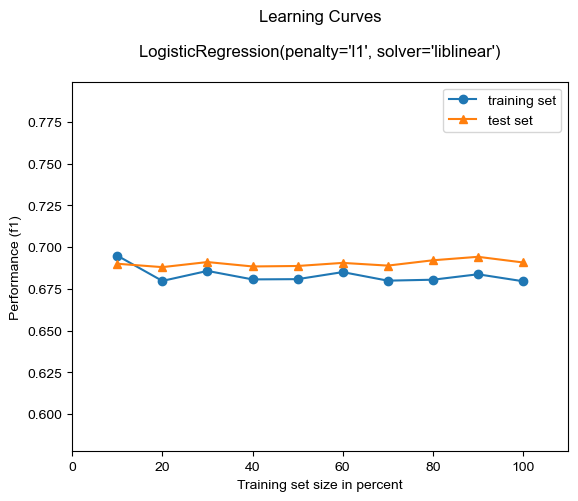

In [258]:
plot_learning_curves(X_train,y_train,X_validation,y_validation,l1_model,scoring='f1')
plt.show()

## Logistic model 2 - Using Penalty as 'L2'

In [259]:
#Ridge 
l2_model = LogisticRegression(penalty='l2', solver='liblinear')
l2_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [260]:
y_train_Pred = l2_model.predict(X_train)
y_validation_Pred = l2_model.predict(X_validation)

In [261]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"L2_model",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565
1,Naive_Bayes,0.820552,0.829704
2,L1_model,0.823122,0.829774
3,L2_model,0.824674,0.829687


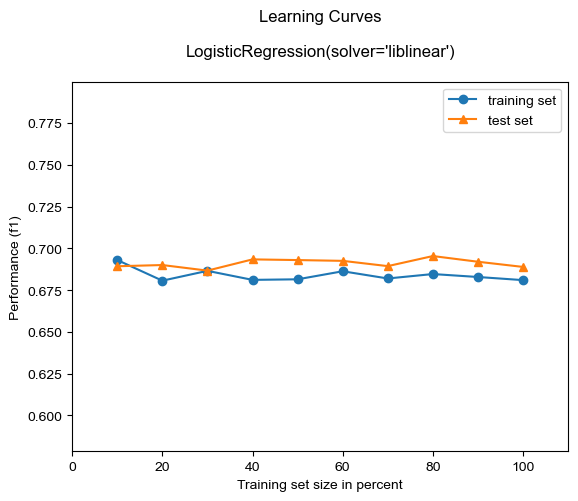

In [262]:
plot_learning_curves(X_train,y_train,X_validation,y_validation,l2_model,scoring='f1')
plt.show()

## Using  'elasticnet'

In [263]:
#Elastic Limit 
Elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5)
Elasticnet_model.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [264]:
y_train_Pred = Elasticnet_model.predict(X_train)
y_validation_Pred = Elasticnet_model.predict(X_validation)

In [265]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"elasticnet",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565
1,Naive_Bayes,0.820552,0.829704
2,L1_model,0.823122,0.829774
3,L2_model,0.824674,0.829687
4,elasticnet,0.618117,0.625005


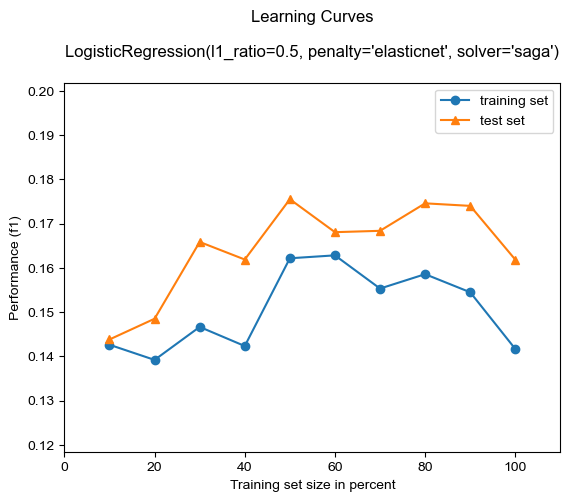

In [266]:
plot_learning_curves(X_train,y_train,X_validation,y_validation,Elasticnet_model,scoring='f1')
plt.show()

# Decision tree 

In [267]:
from sklearn.tree import DecisionTreeClassifier
decisionTree_model = DecisionTreeClassifier(criterion= "entropy", max_depth=10)

In [268]:
decisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [269]:
y_train_Pred = decisionTree_model.predict(X_train)
y_validation_Pred = decisionTree_model.predict(X_validation)

In [270]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"DecisionTreeClassifier",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565
1,Naive_Bayes,0.820552,0.829704
2,L1_model,0.823122,0.829774
3,L2_model,0.824674,0.829687
4,elasticnet,0.618117,0.625005
5,DecisionTreeClassifier,0.940129,0.913863


# KNN

In [277]:
from sklearn.neighbors import KNeighborsClassifier

In [278]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [279]:
knn = KNeighborsClassifier()

In [280]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [281]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1', return_train_score=False,verbose=1)

In [282]:
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [283]:
print(grid_search.best_params_)

{'n_neighbors': 9}


In [284]:
knn_model= grid_search.best_estimator_

In [285]:
knn_model

KNeighborsClassifier(n_neighbors=9)

In [286]:
y_train_Pred = knn_model.predict(X_train)
y_validation_Pred = knn_model.predict(X_validation)

In [287]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"knn_model",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565
1,Naive_Bayes,0.820552,0.829704
2,L1_model,0.823122,0.829774
3,L2_model,0.824674,0.829687
4,elasticnet,0.618117,0.625005
5,DecisionTreeClassifier,0.940129,0.913863
6,knn_model,0.836006,0.816845


# Random Forest

In [294]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)

In [295]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [296]:
y_train_Pred = rf_model.predict(X_train)
y_validation_Pred = rf_model.predict(X_validation)

In [297]:
scores = get_metrics(y_train,y_train_Pred,y_validation,y_validation_Pred,"Random_Forest",scores)
scores

,Model,Train_F1_Score,validation_F1_Score
0,Logistic_Regression,0.685133,0.692565
1,Naive_Bayes,0.820552,0.829704
2,L1_model,0.823122,0.829774
3,L2_model,0.824674,0.829687
4,elasticnet,0.618117,0.625005
5,DecisionTreeClassifier,0.940129,0.913863
6,knn_model,0.836006,0.816845
7,Random_Forest,1.000000,0.932578


# Test Data

### Loading datasets

In [300]:
demographics_test = pd.read_csv("Test_Demographics.csv",na_values="NA")

In [301]:
claim_test = pd.read_csv("Test_Claim.csv",na_values=("?","-5","MISSINGVALUE",'MISSEDDATA'))

In [302]:
policy_test = pd.read_csv("Test_Policy.csv",na_values=("-1","MISSINGVAL","NA"))

In [303]:
vehicle_test = pd.read_csv("Test_Vehicle.csv",na_values="???")

In [304]:
testdata = pd.read_csv("Test.csv")

In [305]:
#shape of all data frames
print(demographics_test.shape)
print(claim_test.shape)
print(policy_test.shape)
print(vehicle.shape)
print(testdata.shape)

(8912, 10)
(8912, 19)
(8912, 10)
(115344, 3)
(8912, 1)


### Test Demographics data

In [306]:
demographics_test.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


### Test Claim Data

In [307]:
claim_test.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100


### Test Policy Data

In [308]:
policy_test.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


### Test Vehicle Data

In [309]:
vehicle_test.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry


#### vehicle data is inadequate so we need to arrange data properly

In [310]:
V1=vehicle_test['VehicleAttribute'].unique()
vehicle_test=pd.concat([vehicle_test.set_index(['CustomerID']).groupby('VehicleAttribute')['VehicleAttributeDetails'].get_group(key) for key in V1],axis=1)
vehicle_test.columns=V1
vehicle_test.reset_index(inplace=True)

In [311]:
vehicle_test.head()

,CustomerID,VehicleModel,VehicleID,VehicleYOM,VehicleMake
0,Cust28465,92x,Vehicle36793,2001,Suburu
1,Cust20319,Jetta,Vehicle7679,2006,Dodge
2,Cust34403,Camry,Vehicle26765,2014,Toyota
3,Cust2595,X6,Vehicle25368,2013,BMW
4,Cust8061,Civic,Vehicle29502,2002,Honda


### Test Target Data

In [312]:
testdata.head()

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003


### Merging the dataframes

In [313]:
test_df = pd.merge(pd.merge(pd.merge(pd.merge(demographics_test,claim_test),vehicle_test),policy_test),testdata)    

In [113]:
test_df.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,VehicleMake,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,...,Volkswagen,119129,84,1998-05-10,State2,500/1000,2000,1006.00,0,own-child
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,...,Nissan,119131,232,2011-11-10,State3,100/300,500,1279.17,0,unmarried
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India,...,Suburu,119136,218,2010-07-17,State2,250/500,1000,1454.67,1235986,other-relative
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,...,Accura,119141,205,2000-09-10,State3,500/500,2000,1287.76,5873212,wife
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,...,Dodge,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child


In [314]:
test_df.shape

(8912, 41)

In [315]:
#checking the null values
test_df.isnull().sum()

CustomerID                       0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
Country                          4
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     7
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                       12
PoliceReport                  3014
AmountOfTotalClaim               8
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
VehicleModel        

### Imputation

In [316]:
test_cat_cols = test_df.select_dtypes(include=['object']).columns
test_num_cols = test_df.select_dtypes(include=['float64','int64']).columns

In [317]:
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
cols = test_df[test_num_cols].columns
test_df[cols] = imputer.fit_transform(test_df[cols])

In [318]:
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
cols = test_df[test_cat_cols].columns
test_df[cols] = imputer.fit_transform(test_df[cols])

In [319]:
test_df.isnull().sum()

CustomerID                    0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
VehicleModel                  0
VehicleID                     0
VehicleYOM                    0
VehicleM

### Standardize Numeric Attributes

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_df[test_num_cols]=scaler.fit_transform(test_df[test_num_cols])

### Data Type Conversion

In [320]:
test_df.dtypes

CustomerID                     object
InsuredAge                    float64
InsuredZipCode                float64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                  float64
CapitalLoss                   float64
Country                        object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles              float64
PropertyDamage                 object
BodilyInjuries                float64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfProp

In [321]:
test_df[test_cat_cols] = test_df[test_cat_cols].apply(lambda col: col.astype('category'))
test_df[test_num_cols] = test_df[test_num_cols].apply(lambda col: col.astype('float64'))

In [322]:
test_df.dtypes

CustomerID                    category
InsuredAge                     float64
InsuredZipCode                 float64
InsuredGender                 category
InsuredEducationLevel         category
InsuredOccupation             category
InsuredHobbies                category
CapitalGains                   float64
CapitalLoss                    float64
Country                       category
DateOfIncident                category
TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState                 category
IncidentCity                  category
IncidentAddress               category
IncidentTime                   float64
NumberOfVehicles               float64
PropertyDamage                category
BodilyInjuries                 float64
Witnesses                      float64
PoliceReport                  category
AmountOfTotalClaim             float64
AmountOfInjuryClaim      

In [324]:
X_test_df = test_df.copy()

In [325]:
test_category = test_df.select_dtypes(include=['category']).columns
test_numerical = test_df.select_dtypes(include=['float64']).columns

### Label Encoding

In [326]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
label_encoders = {}
categorical_columns = test_category

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    test_df[column] = label_encoders[column].fit_transform(test_df[column])

### Random forest Classifier

In [327]:
# create y-labels through the learned model
x_test = rf_model.predict(test_df)  
print(x_test)

[0 0 1 ... 0 0 0]


In [328]:
x_test = pd.DataFrame(x_test)

In [329]:
x_test.value_counts()

0    6844
1    2068
dtype: int64

In [330]:
x_test.columns=['ReportedFraud']

In [331]:
final_df =X_test_df.join(x_test)

In [332]:
final_df.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10008,27.0,471704.0,FEMALE,High School,adm-clerical,base-jumping,56400.0,-57000.0,India,...,119129.0,84.0,1998-05-10,State2,500/1000,2000.0,1006.00,0.0,own-child,0
1,Cust10010,40.0,455810.0,FEMALE,MD,prof-specialty,golf,56700.0,-65600.0,India,...,119131.0,232.0,2011-11-10,State3,100/300,500.0,1279.17,0.0,unmarried,0
2,Cust10015,39.0,461919.0,MALE,JD,other-service,movies,30400.0,0.0,India,...,119136.0,218.0,2010-07-17,State2,250/500,1000.0,1454.67,1235986.0,other-relative,1
3,Cust10020,38.0,600904.0,FEMALE,Masters,exec-managerial,video-games,68500.0,0.0,India,...,119141.0,205.0,2000-09-10,State3,500/500,2000.0,1287.76,5873212.0,wife,1
4,Cust1003,29.0,430632.0,FEMALE,PhD,sales,board-games,35100.0,0.0,India,...,110124.0,134.0,2000-09-06,State3,100/300,2000.0,1413.14,5000000.0,own-child,1


In [333]:
final = final_df.loc[:,['CustomerID','ReportedFraud']]

In [334]:
final

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,1
3,Cust10020,1
4,Cust1003,1
...,...,...
8907,Cust9984,0
8908,Cust9986,1
8909,Cust9990,0
8910,Cust9995,0


In [144]:
#final.to_csv("Final_File.csv")